In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2022-05-16 14:39:36--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   294MB/s    in 0.2s    

2022-05-16 14:39:37 (294 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

In [ ]:
# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
print('Content of base directory:')
print(os.listdir(base_dir))

Content of base directory:
['vectorize.py', 'validation', 'train']


In [ ]:
# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with training dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.776.jpg', 'cat.734.jpg', 'cat.231.jpg', 'cat.656.jpg', 'cat.421.jpg', 'cat.592.jpg', 'cat.631.jpg', 'cat.740.jpg', 'cat.585.jpg', 'cat.340.jpg']
['dog.863.jpg', 'dog.431.jpg', 'dog.352.jpg', 'dog.651.jpg', 'dog.576.jpg', 'dog.758.jpg', 'dog.574.jpg', 'dog.424.jpg', 'dog.66.jpg', 'dog.250.jpg']


In [ ]:
print('total training cat images: ', len(os.listdir(    train_cats_dir)))
print('total training dog images: ', len(os.listdir(    train_dogs_dir)))

print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500


In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

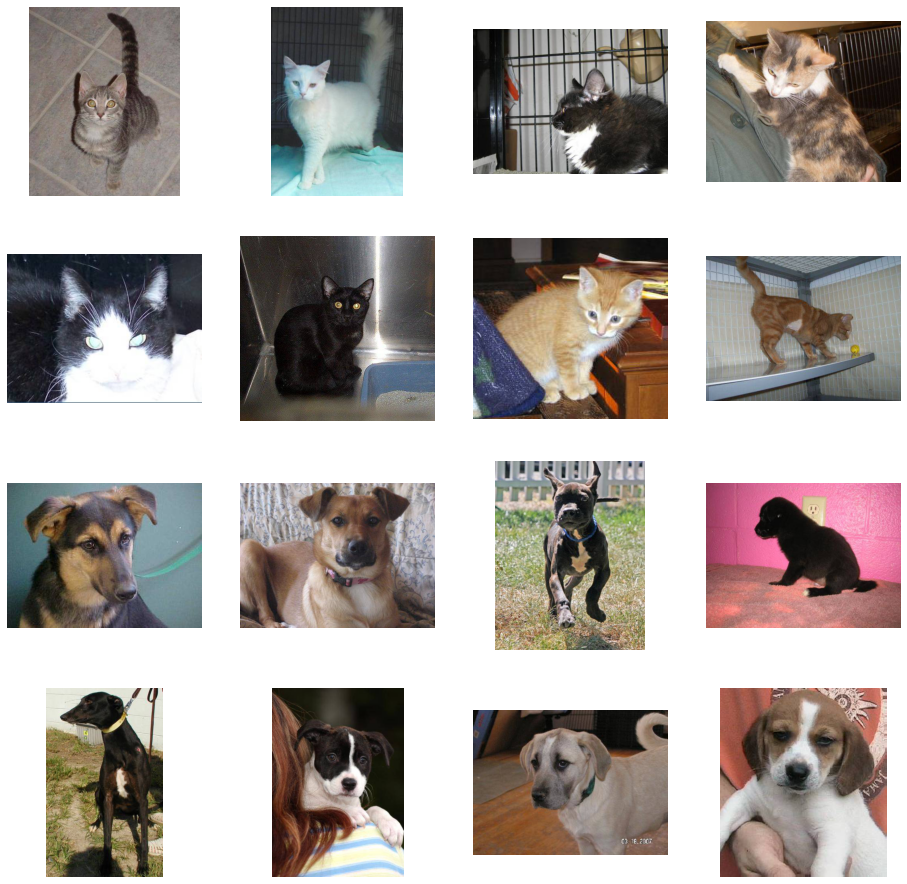

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([

          tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512,  activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')                            
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode='binary'
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
EPOCHS = 20

model = create_model()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100, #2000 images = batch_size * steps
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/20
100/100 [==============================] - 100s 990ms/step - loss: 0.6948 - accuracy: 0.5265 - val_loss: 0.6804 - val_accuracy: 0.5960
Epoch 2/20
100/100 [==============================] - 99s 986ms/step - loss: 0.6622 - accuracy: 0.6155 - val_loss: 0.6454 - val_accuracy: 0.6560
Epoch 3/20
100/100 [==============================] - 99s 991ms/step - loss: 0.6179 - accuracy: 0.6630 - val_loss: 0.6536 - val_accuracy: 0.5860
Epoch 4/20
100/100 [==============================] - 99s 988ms/step - loss: 0.5705 - accuracy: 0.7075 - val_loss: 0.5798 - val_accuracy: 0.6830
Epoch 5/20
100/100 [==============================] - 99s 988ms/step - loss: 0.5336 - accuracy: 0.7440 - val_loss: 0.5639 - val_accuracy: 0.7100
Epoch 6/20
100/100 [==============================] - 99s 990ms/step - loss: 0.4978 - accuracy: 0.7600 - val_loss: 0.5502 - val_accuracy: 0.7150
Epoch 7/20
100/100 [==============================] - 99s 988ms/step - loss: 0.4665 - accuracy: 0.7805 - val_loss: 0.5346 - val_a

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

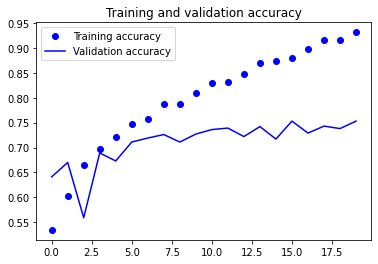

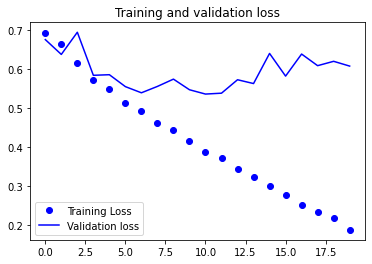

In [ ]:
plot_loss_acc(history)

Model With data Augmentation

In [ ]:
# create new model
model_for_aug = create_model()

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Avoid thsi step to see fluctuation with test data
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50  # 1000 images = batch_size * steps
      )

Epoch 1/20
100/100 [==============================] - 24s 232ms/step - loss: 0.6963 - accuracy: 0.5185 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 29s 291ms/step - loss: 0.6868 - accuracy: 0.5510 - val_loss: 0.6781 - val_accuracy: 0.5800
Epoch 3/20
100/100 [==============================] - 24s 236ms/step - loss: 0.6742 - accuracy: 0.5850 - val_loss: 0.6516 - val_accuracy: 0.6460
Epoch 4/20
100/100 [==============================] - 23s 228ms/step - loss: 0.6598 - accuracy: 0.6020 - val_loss: 0.6452 - val_accuracy: 0.6100
Epoch 5/20
100/100 [==============================] - 23s 229ms/step - loss: 0.6507 - accuracy: 0.6190 - val_loss: 0.6200 - val_accuracy: 0.6530
Epoch 6/20
100/100 [==============================] - 23s 227ms/step - loss: 0.6370 - accuracy: 0.6400 - val_loss: 0.6163 - val_accuracy: 0.6500
Epoch 7/20
100/100 [==============================] - 23s 228ms/step - loss: 0.6137 - accuracy: 0.6570 - val_loss: 0.6008 - val_ac

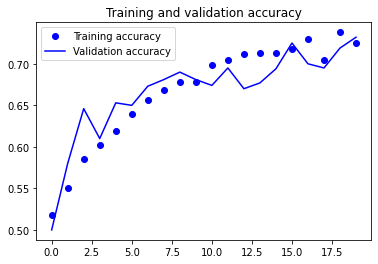

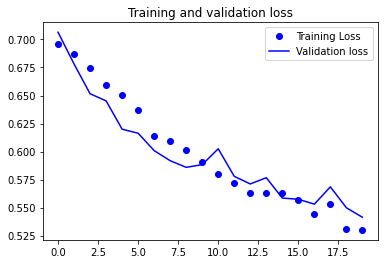

In [ ]:
plot_loss_acc(history_with_aug)

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")
 